\> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# V: K-means clustering

<div style="text-align: right"> **Due date: Nov. 30, 2018.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 9 PM.** </div> 
<h4><div style="text-align: right"> **For one day late (70% credit), please send your file to your TAs in the form of [ID_Name_HW5.ipynb].**</div> </h4>
<div style="text-align: right"> Beomjun Kim(김범준): <a href="mailto:beomjun.kim@yonsei.ac.kr">beomjun.kim@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Chanho Um(엄찬호): <a href="mailto:chanho0103@yonsei.ac.kr">chanho0103@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">[2016142072] [NamGilHyun]</span> </h2>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2018-11-21 13:12:50.403742


## Problem description

In this homework, we will implement a k-means clustering algorihms, one of unsueprvised learning approaches. The unlabeled dataset ($\texttt{kmeans.csv}$) contains two features ($\texttt{x1}$ and $\texttt{x2}$), and you can visualize the distributions of data as follows.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# input data
df = pd.read_csv('kmeans.csv')
df.head()

,x1,x2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
df.mean()

x1    40.611358
x2    22.862141
dtype: float64

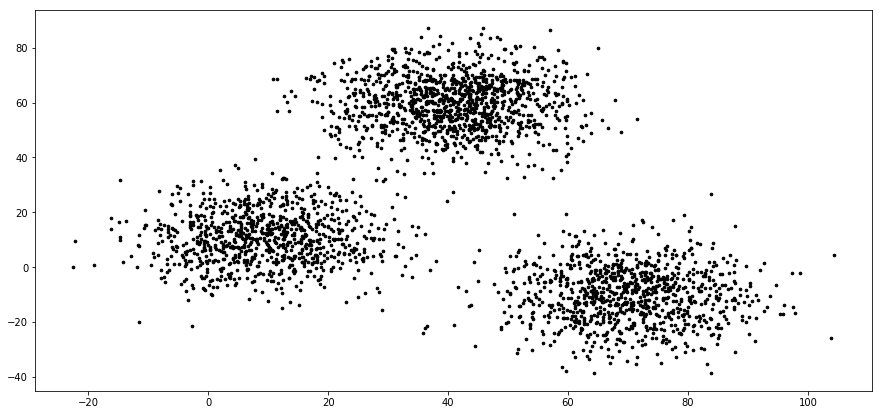

In [5]:
# plot
x1 = df['x1'].values
x2 = df['x2'].values
plt.rcParams['figure.figsize'] = (15, 7)
plt.scatter(x1, x2, c='k', s = 7) 

### I. K-means clustering 
(*70 points*) P1.1 Implement a k-means clustering method. It inputs the features and the number of clusters $k$, and outputs cluster labels and centers. Initialize cluster centers randomly and use the Euclidean distance.  

(*10 points*) P1.2 Visualize cluster labels and centers for different $k$ values where $k=1,2,3,6,10$. To plot cluster labels, use different colors to indicate different memberships (cluster labels). 

### II. Evaluation 
(*20 points*) P2.1 Compute cluster heterogeneities for each $k$, and find the best one. 

**P1**

In [6]:
data = df.values
def init_centroid(data, k): # select k random centroids
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def label_assign(data, centroids): #  Assign to the data a label indicating the center nearest to the data.
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2)) # we use eucledian distance
    return np.argmin(distances, axis=0)

def renew_centroids(data, arr_label, centroids): # Renew the centroids with the average value of the data allocated with the same label.
    return np.array([data[arr_label==k].mean(axis=0) for k in range(centroids.shape[0])])

In [7]:
# Implementing kmeans function 
def Kmeans(data,k):
    c = init_centroid(data, k) # Initialize Centroids
    arr_label = label_assign(data, c)
    its = 0 # number of iterations
    while(1):
        prev_al = arr_label.copy() # save previous arr_label
        c = renew_centroids(data,arr_label,c)
        arr_label = label_assign(data,c)
        t = (arr_label==prev_al)
        if False not in t: # checking converge condition
            break
        
        its += 1
   
    return c, arr_label, its
    

기본적으로 k-means 알고리즘은 k개의 cluster를 예를 들자면, 처음에는 랜덤으로 k개의 centroids를 정하고 이후에는 모든 data points들에 대해 data point와 정해진 centroids들 중 가장 가까운 centroids로 point를 labeling 하고 이후에는 같은 label로 labeling된 data point들의 평균값을 새로운 centroid로 정하여 이 과정을 반복한 후 더 이상 data point의 label이 바뀌지 않을 때까지 반복한다. 주어진 수렴조건이 이전 centroid와 현재 centroid사이의 eucledian distance가 0이 될때 이므로 이는 centroid가 같다는 말이고 centroid가 같다면 전체 data point들의 label이 같다고 볼 수 있다. 따라서 arr_label이 같으면 반복문을 탈출하고 arr_label 과 c(centroids), its(반복한 수)를 반환한다. 이 과정을 거치면 data point들은 k개의 클러스터로 정해져 있다. 

data point들과 cluster의 개수를 나타내는 k를 input으로 받고 output으로는 k개의 centroids와 data point들이 labeling된 결과, 수렴할 때까지의 iteration 개수를 반환하게 한 Kmeans라는 함수를 구현하였다. 여기서 한 iteration이란 이전의 라벨링된 상태에서 같은 라벨로 표시된 cluster내에서 평균값을 새로운 centroid로 한 후 다시 라벨링 하는 과정을 말한다. 따라서 정해진 centroids들에 대해 data들을 label하는 함수인 label_assign 함수와 각 클러스터에 속한 데이터들의 평균으로 새롭게 centroid를 갱신하는 renew_centroids 함수, 마지막으로 처음에 data중 k개 point를 랜덤으로 골라서 centroids로 정하는 init_centroid를 구현하였다. 

label_assign 함수 같은 경우에는 distance 라는 각 데이터 포인트마다 k개의 centroid에 대한 거리를 성분으로 하는 행렬을 정의한 후에 한 데이터 포인트의 k개 거리 중 가장 작은 거리를 나타내는 성분의 index(즉, label)를 행렬의 성분으로 하는 행렬을 반환한다(argmin 메서드 이용). distance 행렬을 쉽게 구하기 위해서 centroid 행렬에 축을 추가한 후 data와 중심들간의 거리를 쉽게 계산할 수 있도록 하였다. 반환하는 행렬은 총 data point의 개수만큼의 원소의 개수를 가지고 있고, 각 원소들은 자신과 가장 가까운 centroid를 나타내는 0~k-1중 하나의 수를 값으로 가진다. 

centroid를 갱신하는 renew_centroids함수 같은 경우에는 같은 라벨을 가지고 있는 data들의 x,y좌표의 평균값을 새로운 centroid의 좌표로 한다.(.mean 메서드 이용) 리스트 표현식을 활용하여 쉽게 새로운 centroids들의 좌표가 들어있는 array를 만들 수 있었다. 이를 통해 새로운 k개의 centroid들을 반환한다. 



In [8]:
n_c1, cc1, its1 = Kmeans(data,1)
print(its1)

0


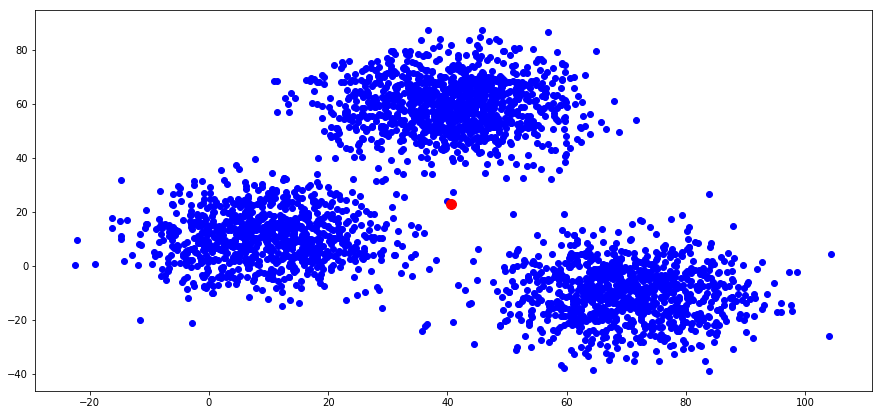

In [9]:
# k=1 일때 cluster visualization
for i in range(data.shape[0]):
    if cc1[i]==0:
        plt.scatter(data[i, 0], data[i, 1],c='b')
    if cc1[i]==1:
        plt.scatter(data[i, 0], data[i, 1],c='g')
    if cc1[i]==2:
        plt.scatter(data[i, 0], data[i, 1],c='y')   
    
plt.scatter(n_c1[:, 0], n_c1[:, 1], c='r', s=100)
plt.show()

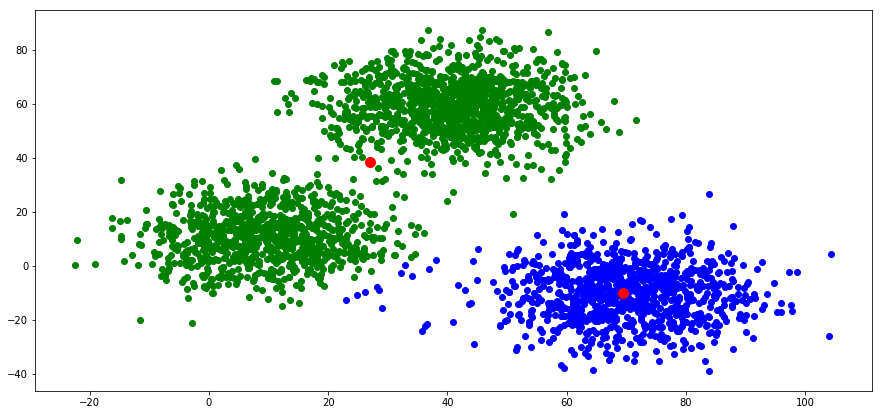

In [10]:
# k=2 일때 cluster visualization
n_c2, cc2, its2 = Kmeans(data,2)

for i in range(data.shape[0]):
    if cc2[i]==0:
        plt.scatter(data[i, 0], data[i, 1],c='b')
    if cc2[i]==1:
        plt.scatter(data[i, 0], data[i, 1],c='g')
    if cc2[i]==2:
        plt.scatter(data[i, 0], data[i, 1],c='y')   
    
plt.scatter(n_c2[:, 0], n_c2[:, 1], c='r', s=100)
plt.show()

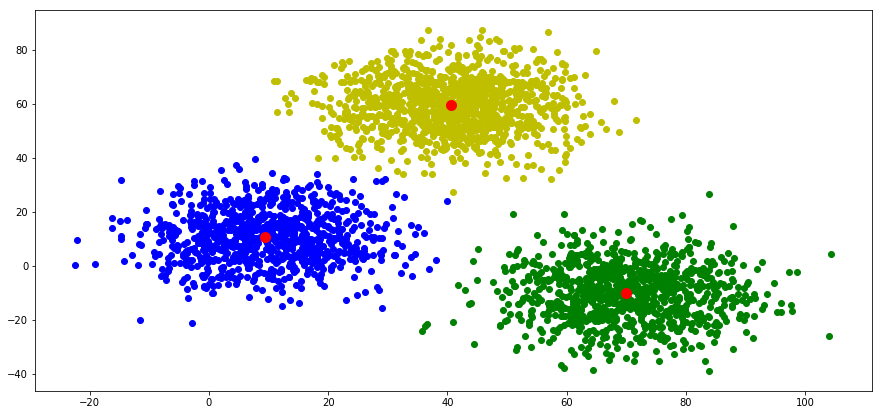

In [11]:
# k=3 일때 cluster visualization
n_c3, cc3, its3 = Kmeans(data,3)

for i in range(data.shape[0]):
    if cc3[i]==0:
        plt.scatter(data[i, 0], data[i, 1],c='b')
    if cc3[i]==1:
        plt.scatter(data[i, 0], data[i, 1],c='g')
    if cc3[i]==2:
        plt.scatter(data[i, 0], data[i, 1],c='y')   
    
plt.scatter(n_c3[:, 0], n_c3[:, 1], c='r', s=100)
plt.show()

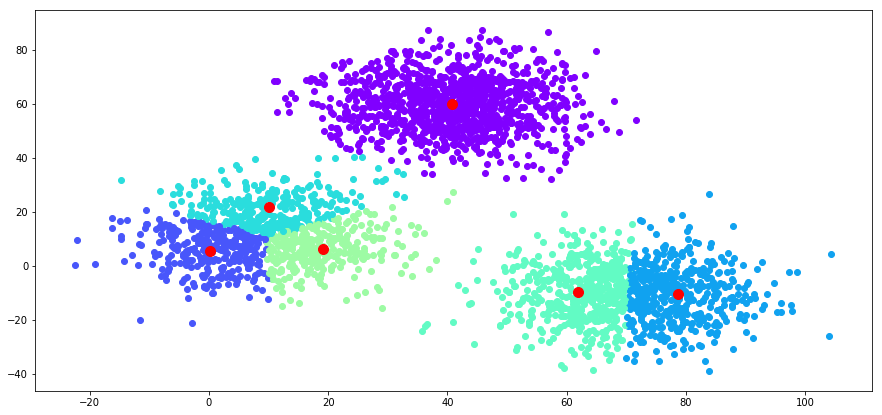

In [12]:
# k = 6 일때 cluster visualization
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 10))
n_c6, cc6, its6 = Kmeans(data,6)

for i in range(data.shape[0]):
    if cc6[i]==0:
        plt.scatter(data[i, 0], data[i, 1],c=colors[0])
    if cc6[i]==1:
        plt.scatter(data[i, 0], data[i, 1],c=colors[1])
    if cc6[i]==2:
        plt.scatter(data[i, 0], data[i, 1],c=colors[2])
    if cc6[i]==3:
        plt.scatter(data[i, 0], data[i, 1],c=colors[3])  
    if cc6[i]==4:
        plt.scatter(data[i, 0], data[i, 1],c=colors[4])
    if cc6[i]==5:
        plt.scatter(data[i, 0], data[i, 1],c=colors[5]) 
plt.scatter(n_c6[:, 0], n_c6[:, 1], c='r', s=100)
plt.show()

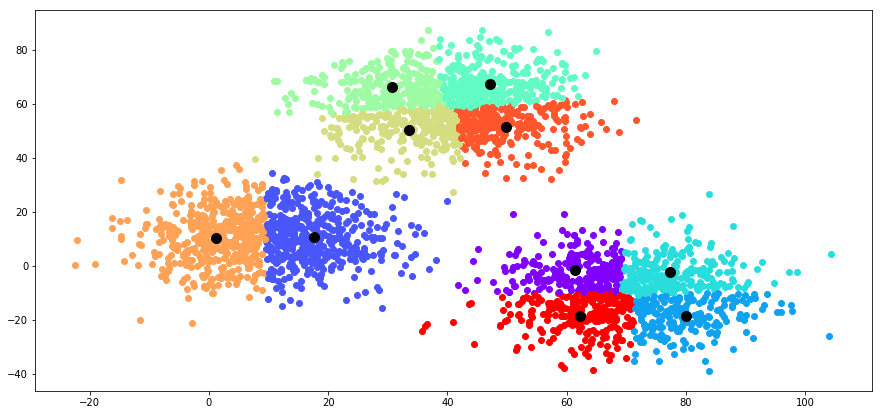

In [13]:
# k = 10 일때 cluster visualization
n_c10, cc10, its10 = Kmeans(data,10)

for i in range(data.shape[0]):
    for j in range(10):
        if cc10[i]==j:
            plt.scatter(data[i, 0], data[i, 1],c=colors[j])
   
    
plt.scatter(n_c10[:, 0], n_c10[:, 1], c='black', s=100) # centroid 의 색과 label의 색이 빨간색으로 겹쳐서 centroid 색 검은색으로 label함
plt.show()

k가 1,2,3,6,10일때 data point들에 대해 cluster와 cluster의 centroid를 표시해 보았다. 위에 정의한 Kmeans 함수를 통해 centroid와 데이터 포인트들이 라벨된 labeld array를 받아서 scatter를 통해 표시하였다. cluster마다 다른 색으로 나타내었고, centroid는 빨간색 점으로 나타내었다. k가 10일때는 cluster색에 빨간색이 있어서 centroid를 검정색으로 표시하였다. 5가지 경우마다 주어진 k값에 맞게 clustering된 것을 확인할 수 있었다. 또한 분포에서 봤을 때 3개의 군집으로 나누는 것이 가장 자연스러워 보였는데 역시 k가 3일때가 일반적인 시선으로 봤을 때 잘 clustering된 것 같다.

**P2**

In [14]:
def cluster_h(data,c,cc): # Calculate cluster heterogeneity 
    ans = 0
    
    for i in range(data.shape[0]):
        
        for j in range(c.shape[0]):
            if cc[i]==j:
                ans+=(np.linalg.norm(data[i]-c[j]))**2 # data point 와 centroid간의 거리의 제곱을 더한다. 
      
        
    return ans

c_x = [1,2,3,6,10]
cl_set=[]       


cl_set.append(cluster_h(data,n_c1,cc1))
cl_set.append(cluster_h(data,n_c2,cc2))
cl_set.append(cluster_h(data,n_c3,cc3))
cl_set.append(cluster_h(data,n_c6,cc6))
cl_set.append(cluster_h(data,n_c10,cc10))
    


clustering의 quality를 측정하는 measure인 cluster heterogeneity 는 다음과 같다.

\\(\sum _{ j=1 }^{ k }{ \sum _{ i:{ z }_{ i }=j }^{  }{ { \left\| { \mu  }_{ j }-{ x }_{ i } \right\|  }_{ 2 }^{ 2 } }  } \\)

위 식에서 \\({ \mu  }_{ j }\\) 는 label이 j인 cluster의 centroid고 x는 data point이다.
이는 각 cluster에서 cluster의 centroid와 cluster에 포함된 data point들과의 거리의 제곱을 다 더한 것이다. k-means는 이 sum of squared distance를 최소화하는 것이 목적이다. (overfitting이 되지 않은 상태에서)
cluster heterogeneity는 일반적으로 낮을수록 좋다. 하지만 cluster의 수인 k가 증가할수록 cluster heterogeneity는 낮아지는데, 특정 k 이상일 때는 overfitting이 발생한 경우이므로 무조건 k가 클수록 clustering이 잘 된것은 아니다. 극단적으로, k가 데이터 포인트의 개수와 같을 때는 cluster heterogeneity가 0이지만 이는 아무 의미 없는 결과이다. 따라서 k에 따른 cluster heterogeneity는 clustering의 정확성과 overfitting의 tradeoff가 있으므로 이를 고려하여 k를 선택해야 한다.

In [15]:
cl_set

[5030433.09612008,
 2309985.3891687826,
 611605.8806933895,
 443212.74635190784,
 271410.64493828453]

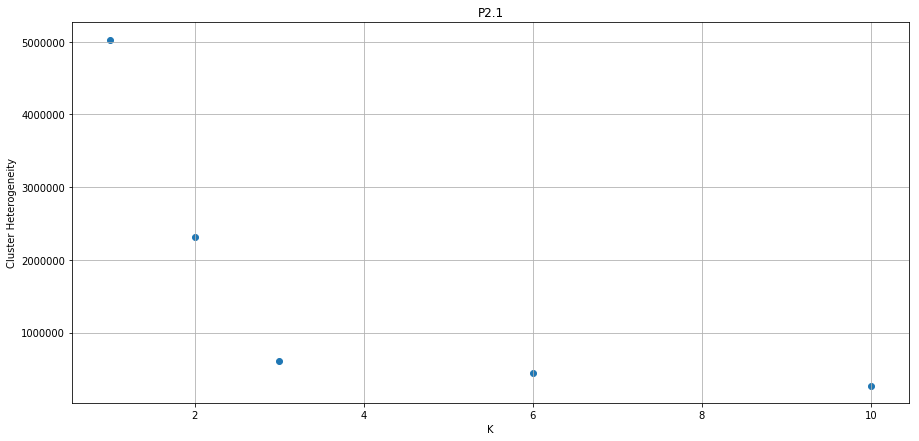

In [16]:
# Plot the graph
plt.scatter(c_x,cl_set)
plt.title('P2.1')
plt.ylabel('Cluster Heterogeneity')
plt.xlabel('K')
plt.grid(True)
plt.show()

In [17]:
cl_set[2]

611605.8806933895

k가 1,2,3,6,10일때의 cluster heterogeneity를 plot해본 결과 이론과 같이 k가 클수록 감소된 것을 확인할 수 있었다. 이 그래프를 자세히 보면, 
k가 1->2일때와 2->3일때는 급격하게 감소하였으나 k가 3 이후로는 감소량이 엄청 작아진 것을 확인할 수 있었다. 이는 3이후로는 overfitting이 되어서 cluster heterogeneity의 변화량이 작은 것으로 볼 수 있다. 따라서  best k는 3임을 알 수 있다. 또한 문제 정의 밑부분에 feature x1과 x2의 값을 좌표로 하여 데이터 포인트들이 plot된 것을 보면 크게 3가지 군집으로 나누는게 가장 적합해보임을 육안으로 확인 가능하고, 이는 cluster heterogeneity 값으로 정한 결과와 일치한다.